<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

**Задание**

>Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
<br><br>
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных**

| features | description
| -------- | :---------- |
| Обучающие | Пол, Возраст, Зарплата, Члены семьи
| Целевой | Страховые выплаты - количество выплат за последние 5 лет

## Загрузка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

Загрузим файл CSV и сохраним в переменную *data*.

In [3]:
data = pd.read_csv('datasets/insurance.csv')

Проверим загруженную таблицу, общую информацию и описание.

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Построим гистограмму распределения целевого признака.

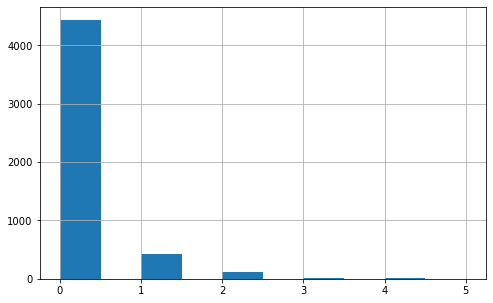

In [13]:
data['Страховые выплаты'].hist(figsize=(8, 5))
plt.show()

Данные загружены корректно. В таблице отсутствуют пропуски, типы данных приведены к численным, а значения имеют адекватные распределения.

## Умножение матриц

Есть идея, что зашифровать данные клиентов можно с помощью умножения матрицы признаков на некую случайную матрицу. Не зная случайную матрицу, восстановить данные клиентов не получится. Нам необходимо выяснить как такой метод повлияет на предсказания линейной регрессии.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Задача:**  Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- Изменится. Приведите примеры матриц.
- Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** Не изменится

**Обоснование:**

Представим новые признаки (Z) как произведение старых признаков (X) и обратимой матрицы (R):

$$Z = X*R$$
тогда веса признаков будут равны:

$$w_2 = (Z^T Z)^{-1}Z^T y$$

$$w_2 = ((XR)^T XR)^{-1}(XR)^T y$$

Вынесем матрицу R за скобки:

$$w_2 = R^{T(-1)} R^{T} R^{-1} (X^T X)^{-1} X^T y$$

В правой стороне уравнения получилось выразить w из формулы обучения. Введем ее в уравнение:

$$w_2 = R^{T(-1)} R^{T} R^{-1} w$$

Произведение транспонированной матрицы R на обратную ей будет равно единичной матрице E, так как матрица обратимая:

$$w_2 = E R^{-1} w = R^{-1} w$$

Полученное выражение устанавливает связь между двумя векторами весов. Подставим уравнение в формулу предсказаний: 

$$a_2 = Zw_2 = XRw_2$$

$$a_2 = X R R^{-1} w$$

$$a_2 = X w = a$$

Таким образом мы установили, что умножение матрицы признаков на обратимую матрицу не изменяет предсказания линейной регрессии.

## Алгоритм преобразования

**Алгоритм**

Для защиты данных клиентов, матрицу признаков умножим на случайную обратимую матрицу, размером равным количетсву признаков. 
- Для создания матрицы используем функцию <code>numpy.random.normal</code>. Обратимость матрицы контролируем функцией <code>numpy.linalg.inv</code>. В случае, если созданная матрица необратимая, функция вернет ошибку. 
- Зашифрованную матрицу признаков используем для обучения модели линейной регрессии.

**Обоснование**

Как показано выше умножение матрицы признаков на случайную матрицу не влияет на качество предсказательной модели, но это действие приводит к повышению защиты данных клиентов. По зашифрованной матрице восстановить исходную чрезвычайно сложно.

Ниже покажем на примере, что алгоритм преобразования признаков работает для модели линейной регрессии.

Разделим таблицу на обучающие признаки и целевой признак.

In [16]:
features = data.drop('Страховые выплаты', axis=1)
target = data.loc[:, 'Страховые выплаты']

Функция *random_matrix* создает случайную квадратную матрицу и проверяет ее на возможность получения обратной матрицы. Если полученная матрица необратимая, то функция рекурсивно вызывает себя, пока не получит обратимую матрицу.

In [17]:
def random_matrix(shape):
    try:
        matrix = np.random.normal(loc=0, scale=1, size=(shape, shape))
        inverted_matrix = np.linalg.inv(matrix)
    except:
        print('Матрица не обратимая!')
        inverted_matrix = random_matrix(shape)
    return inverted_matrix

Масштабируем признаки методом MinMaxScaler. Применение метода также можно считать шифрованием, так как без исходного scaler крайне сложно понять как данные были изначально.

In [18]:
scaler = MinMaxScaler().fit(features)
features_scaled = pd.DataFrame(scaler.transform(features), columns=features.columns)

Найдем вектор весов для признаков без шифрования, преобразуем признаки и найдем тот же вектор для зашифрованных данных. Для обоих случаев получим предсказания и вычислим разницу между предсказаниями. Проведем эти операци несколько раз, чтобы убедиться в верности выводов.

In [20]:
difference = []
for i in range(50):
    w = np.linalg.inv(features_scaled.T.dot(features_scaled)).dot(features_scaled.T).dot(target)
    a = features_scaled.dot(w)

    inverted_matrix = random_matrix(features.shape[1])
    features_crypted = features_scaled.dot(inverted_matrix)

    w_1 = np.linalg.inv(features_crypted.T.dot(features_crypted)).dot(features_crypted.T).dot(target)
    a_1 = features_crypted.dot(w_1)
    
    difference.append(abs(a - a_1).mean())

difference = pd.Series(difference)
print('Разница в предсказаниях моделей:\nmin: {:.2e}\nmax: {:.2e}'.format(difference.min(), difference.max()))

Разница в предсказаниях моделей:
min: 3.10e-16
max: 3.22e-12


Разница в предсказаниях близка к нулю. Преобразования матрицы признаков не влияет на предсказания модели.

Построим диаграмму весов признаков исходной матрицы и преобразованной.

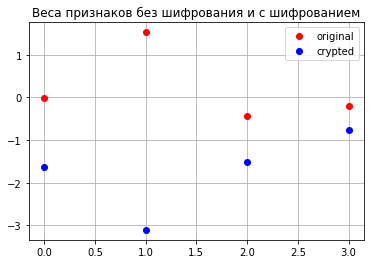

In [21]:
plt.plot(w, 'ro', w_1, 'bo')
plt.legend(labels=['original','crypted'])
plt.title('Веса признаков без шифрования и с шифрованием')
plt.grid()

Внутри модели линейной регрессии умножение на обратимую матрицу приводит к перераспределению весов признаков.

## Проверка алгоритма

Обучим модель линейной регрессии на исходных данных и на зашифрованных данных. Сравним качество предсказаний по метрике R2.

In [22]:
model = LinearRegression()
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)

inverted_matrix = random_matrix(features.shape[1])
features_crypted = features_scaled.dot(inverted_matrix)

model_1 = LinearRegression()
model_1.fit(features_crypted, target)
predictions_1 = model_1.predict(features_crypted)

print('Метрика R2:\nбез шифрования: {:.5f}\nс шифрованием: {:.6f}'.format(
    r2_score(target, predictions), r2_score(target, predictions_1)))

Метрика R2:
без шифрования: 0.42495
с шифрованием: 0.424946


Значения метрики R2 практически равны для обоих наборов данных.

## Вывод

Для защиты данных клиентов страховой компании был предложен алгоритм шифрования данных, основанный на умножении матрицы признаков на случайную обратимую матрицу. Предложенный алгоритм был обоснован теоретически. Было обнаружено, что алгоритм не ухудшает предсказания модели, но позволяет эффективно шифровать данные клиентов.

На примере модели линейной регрессии показали, что качетсво модели с шифрованием не отличается от качества модели без шифрования признаков. **Данный метод шифрования можно использовать для защиты данных клиентов.**